# Hyperparametric Tuning


## Imports

In [50]:
import pandas as pd
import posixpath
from data_mining_project import data, PROJECT_PATH, DATA_PATH, OUTPUT_PATH
import numpy as np
import matplotlib as plt
import ast
import plotly.express as px
from sklearn.metrics import *
import time
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Load Data

In [13]:
filename = "preprocessed_data.csv"
filepath = posixpath.join(OUTPUT_PATH, filename)
data_df = data.load_data_csv(filepath)
data_df = data.reformat_str_to_list(data_df, cols=["events_sequence", "seconds_to_incident_sequence", "dj_ac_state_sequence", "dj_dc_state_sequence", "ac_dc_prob_timestamp"], col_type=int)
data_df = data.reformat_str_to_list(data_df, cols=["train_kph_sequence"], col_type=float)
data_df

,events_sequence,seconds_to_incident_sequence,train_kph_sequence,dj_ac_state_sequence,dj_dc_state_sequence,ac_dc_prob_num,ac_dc_prob_timestamp,ac_dc_prob,incident_type
0,"[1132, 2970, 4082, 4092, 2982, 3236, 4100, 270...","[-5506, -3583, -3546, -3546, -3542, -3478, -34...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,4
1,"[4114, 4168, 4168, 4114, 4168, 4168, 4114, 416...","[-10932, -10932, -10913, -10472, -10472, -1045...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, ...",83,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, ...",1,14
2,"[358, 4056, 4054, 2740, 3528, 3506, 3516, 3528]","[-596, 418, 595, 699, 1122, 1151, 1156, 1178]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1]",0,"[0, 0, 0, 0, 0, 0, 0, 0]",0,2
3,"[4140, 4168, 4140, 4168]","[-139, -105, 944, 953]","[0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0]","[0, 0, 0, 0]",4,"[1, 1, 1, 1]",1,14
4,"[4028, 3620, 4028, 4076, 4028, 4076, 3620, 362...","[-2328, -1970, -1970, -1970, -1498, -1498, -29...","[0.0, 22.8, 22.7, 22.8, 145.4, 145.1, 0.0, 26....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,11
...,...,...,...,...,...,...,...,...,...
640,"[2456, 1620, 1620, 1620, 1620, 1620, 1620, 162...","[2101, -7670, -5337, -3986, -2678, -2016, -127...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,9
641,"[3238, 3512, 4048, 4050, 2740, 3528, 4048, 273...","[-1463, -1463, -1463, -1456, -1174, -1165, -10...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,2
642,"[4158, 4140, 4162, 4160, 4168, 4166, 2252, 411...","[-13835, -13829, -13826, -13822, -13813, -1381...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",56,"[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,14
643,"[4054, 2736, 3240, 3532, 4056, 3540, 2740, 350...","[-24, -23, 33, 33, 36, 41, 107, 121, 146, 158,...","[0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,2


In [14]:
XY = data_df.to_numpy()
XY.shape

(645, 9)

## 10-fold cross validation

In [45]:
def init_confusion_matrix(classes):
    class_count = {c:0 for c in classes}
    confusion_matrix = {}
    for c in classes:
        confusion_matrix[c] = class_count.copy()
    return confusion_matrix
    

def evaluate_model(Y, Yhat, classes):
    confusion_matrix = init_confusion_matrix(classes)    
    for i in range(Y.shape[0]):
        y = Y[i]
        yhat = Yhat[i]
        confusion_matrix[y][yhat] += 1 

    return confusion_matrix

def ten_fold_cross_val(XY, param):
    model_evals = []
    N = XY.shape[0]
    n = XY.shape[1]
    classes = np.unique(XY[:, -1])
    for i in range(1, 11):
        start_index = int((i-1)/10 * N)
        end_index = int((i%10)/10 * N)
        X = XY[:, :-1]
        Y = XY[:, -1]
        X_tr = X[start_index:end_index]
        X_ts = X[end_index:]  
        Y_tr = Y[start_index:end_index]
        Y_ts = Y[end_index:]
        
       # model = train_model(X_tr, Y_tr, param)
       # Yhat = test_model(X_ts, Y_ts, model)

        Y_hat = np.repeat(2, Y_ts.shape[0])      
        model_evals.append(evaluate_model(Y_ts, Y_hat, classes))
    
    model_eval = []
    keys = model_evals[0].keys()
    for i, d in enumerate(model_evals):
        model_eval.append([])
        for j, key1 in enumerate(keys):
            model_eval[i].append([])
            for key2 in keys:
                model_eval[i][j].append(d[key1][key2])
                
    model_eval = np.array(model_eval).mean(axis=0) 
    
    for i, row in enumerate(model_eval):
        max_val = row.max()
        if max_val > 0:
            model_eval[i] = row / max_val
            
    avg_model_eval = {}
    for key1, value in zip(keys, model_eval):
        avg_model_eval[key1] = {}
        for i, key2 in enumerate(keys):
            avg_model_eval[key1][key2] = value[i]
        
    return avg_model_eval

avg_model_eval = ten_fold_cross_val(XY, param=None)
print(avg_model_eval)

{2: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 3: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 4: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 6: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 7: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 9: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 11: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 13: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 14: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 16: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0

In [46]:
def compute_params_eval(XY, params):
    params_eval = {tuple(param): 0 for param in params}
    for param in params:
        params_eval[tuple(param)] = ten_fold_cross_val(XY, params)
        
    return params_eval

params_eval = compute_params_eval(XY, params)
print(params_eval)

{(1, 2, 4, 1, 2): {2: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 3: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 4: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 6: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 7: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 9: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 11: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 13: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 14: {2: 1.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 9: 0.0, 11: 0.0, 13: 0.0, 14: 0.0, 16: 0.0, 17: 0.0, 99: 0.0}, 16: {2: 1.0, 3:

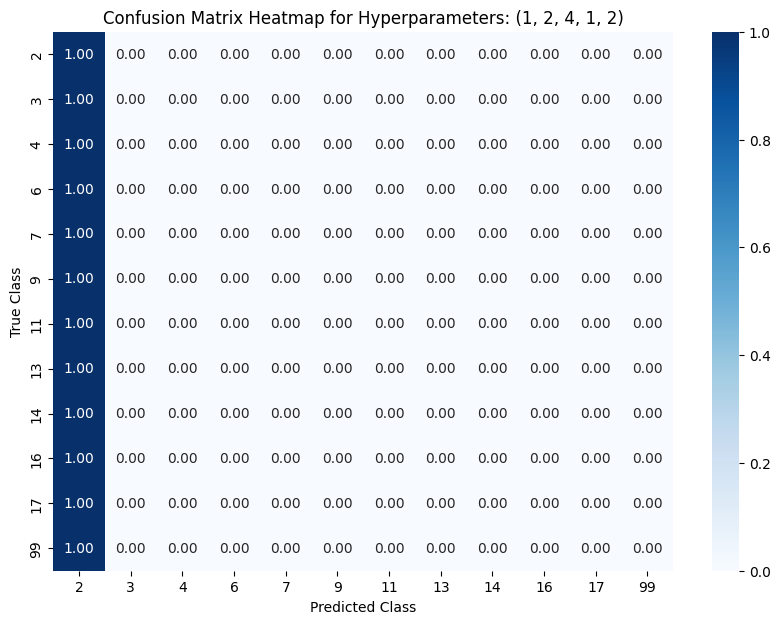

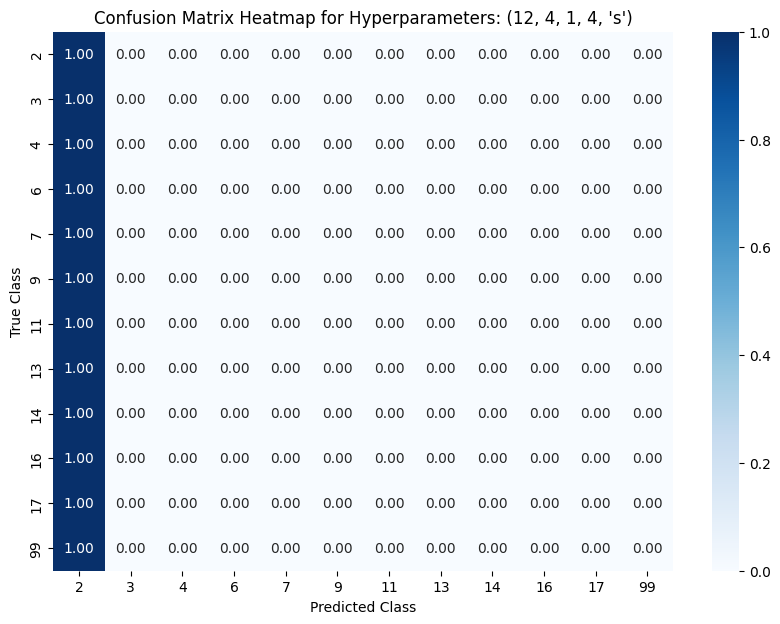

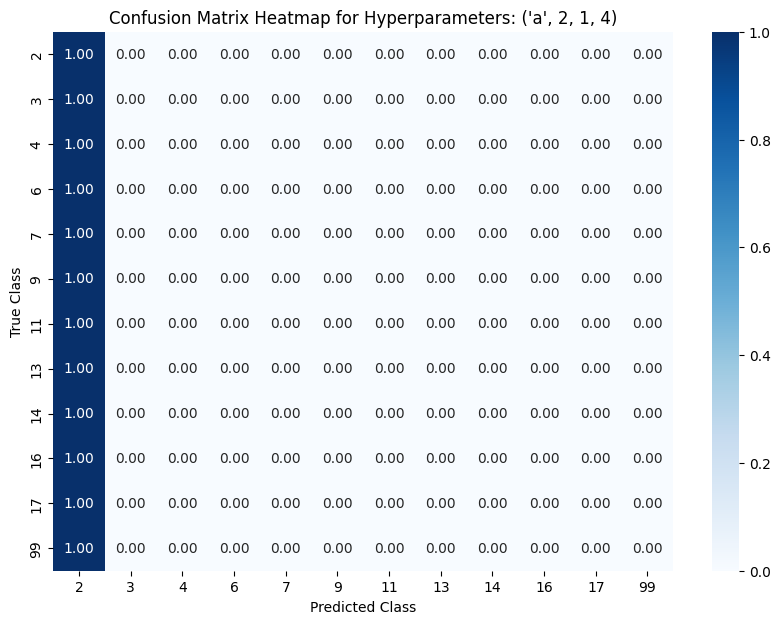

In [66]:
def plot_confusion_matrix(params_eval):
    """
    This function takes a dictionary containing hyperparameter settings and their corresponding confusion matrices.
    It outputs a heatmap of the confusion matrix.
    
    hyperparameters_dict : dict
        A dictionary where keys are hyperparameter settings and values are confusion matrices (nested dictionaries).
    """
    for params, confusion_data in params_eval.items():
        # Assuming the confusion matrix is a dictionary of dictionaries, like {2: {2: 55.8, 3: 0.0, ...}, 3: {2: 2.4, ...}}
        
        # Prepare the confusion matrix (assuming the confusion matrix is complete for all classes)
        # Get the classes in the matrix
        classes = list(confusion_data.keys())
        matrix = []
        
        for class_1 in classes:
            row = []
            for class_2 in classes:
                row.append(confusion_data[class_1].get(class_2, 0))  # Get the confusion value, default to 0 if missing
            matrix.append(row)
        
        # Convert matrix to numpy array for heatmap plotting
        matrix = np.array(matrix)

        
        # Plot the heatmap
        plt.figure(figsize=(10, 7))
        sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='.2f')
        plt.title(f'Confusion Matrix Heatmap for Hyperparameters: {params}')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()

plot_confusion_matrix(params_eval)